In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

In [6]:
# Load data
df = pd.read_csv("EFIplus_medit.csv", delimiter=';')

# Filter for Douro and Tejo catchments
df_filtered = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

# Select quantitative environmental variables by keywords
quantitative_keywords = [
    'Altitude', 'slope', 'sediment', 'Elevation', 'prec_ann', 'temp_',
    'Barriers', 'distance'
]
quantitative_vars = [
    col for col in df_filtered.columns
    if any(keyword in col for keyword in quantitative_keywords)
]

# Extract quantitative data and convert to numeric
df_quant = df_filtered[quantitative_vars].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_quant_clean = df_quant.dropna()

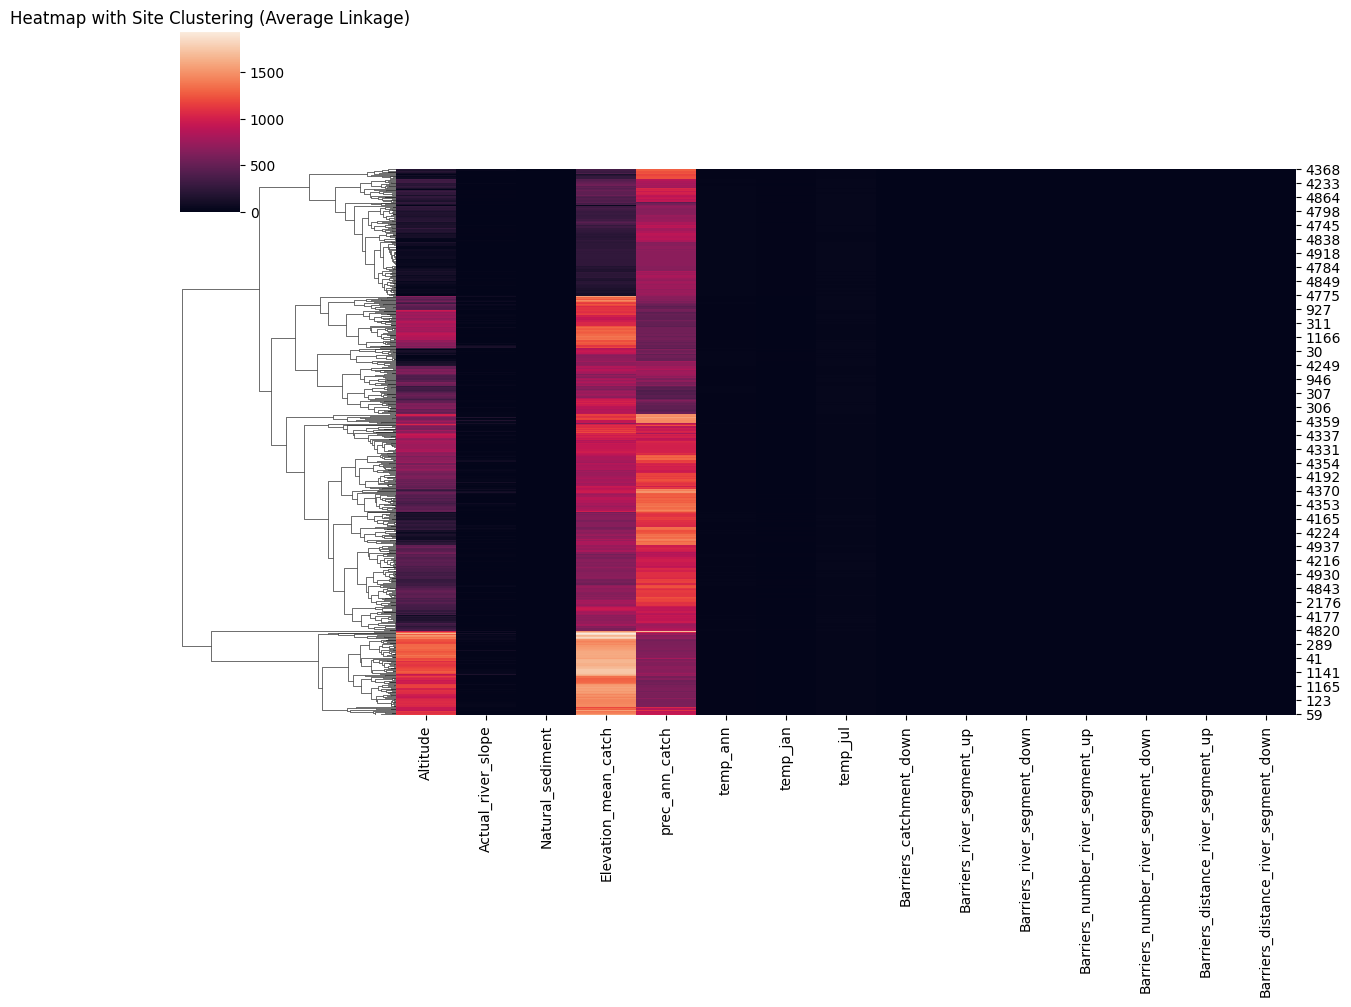

In [7]:
# Heatmap with row clustering 
row_linkage = linkage(df_quant_clean, method='average')

sns.clustermap(
    df_quant_clean,
    row_linkage=row_linkage,
    col_cluster=False,
    method='average',
    figsize=(12, 10)
)
plt.title("Heatmap with Site Clustering (Average Linkage)")
plt.show()

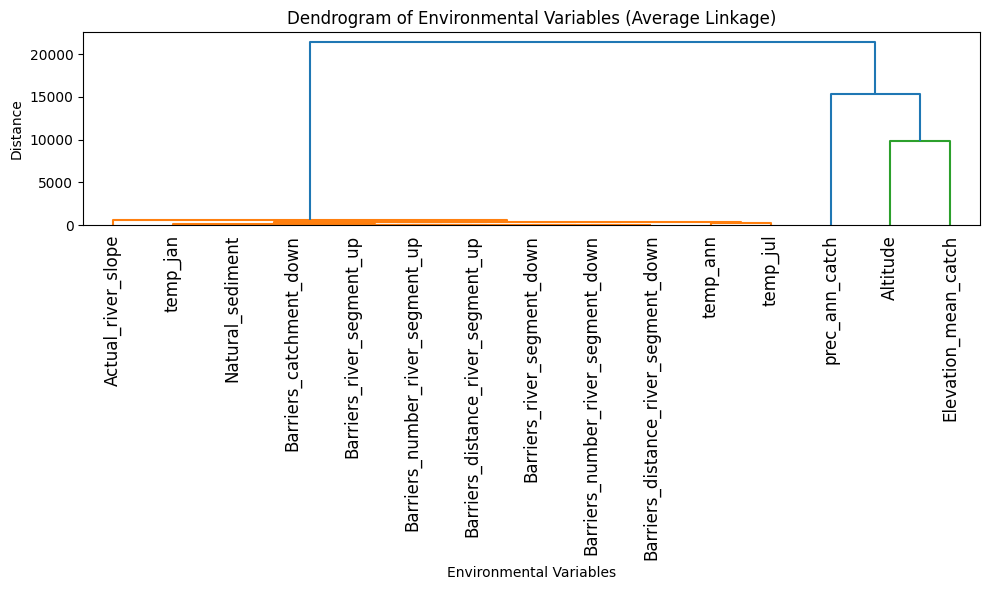

In [8]:
# Dendrogram for environmental variables
df_transposed = df_quant_clean.T
col_linkage = linkage(df_transposed, method='average')

plt.figure(figsize=(10, 6))
dendrogram(col_linkage, labels=df_transposed.index, leaf_rotation=90)
plt.title("Dendrogram of Environmental Variables (Average Linkage)")
plt.xlabel("Environmental Variables")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

The dendrogram of environmental variables groups them based on similarity (correlation or distance in feature space).This clustering reveals which variables carry similar information, since they tend to co-vary across sites. In regression analysis, using highly correlated predictors can lead to multicollinearity, which inflates variance in coefficient estimates and makes interpretation difficult.

By examining the variable dendrogram, we can identify clusters of related variables and select one representative from each cluster. This helps reduce dimensionality, avoid redundancy, and improve model interpretability and performance. For example, if 'temp_ann', 'temp_jul', and 'temp_jan' cluster tightly, we might keep just 'temp_ann' in a regression model.